In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/workspaces/Schneider-Electric-Data-Science-Hackathon-2023/data/processed.csv")

In [3]:
df.head()

,start_time,green_energy_DE,DE_Load,green_energy_HU,HU_Load,green_energy_IT,IT_Load,green_energy_PO,PO_Load,green_energy_SP,SP_Load,green_energy_UK,UK_Load,green_energy_DK,DK_Load,green_energy_SE,SE_Load,green_energy_NE,NE_Load
0,2021-12-31 23:00:00,39401,42196,285,4254,5801.0,21121.0,4641.0,14438.0,11244,20827,0.0,677.0,3652.0,3314.0,11060.0,15331.0,3554,10326
1,2022-01-01 00:00:00,157373,165125,1376,16457,5745.0,19756.0,4491.0,13935.0,10827,19530,0.0,1244.0,3605.0,3218.0,11107.0,15331.0,12768,40706
2,2022-01-01 01:00:00,151747,160415,1526,15426,6228.0,18685.0,4436.0,13579.0,11140,18383,0.0,1131.0,3309.0,3126.0,11036.0,15270.0,11131,39465
3,2022-01-01 02:00:00,147938,158035,1560,14781,6407.0,18124.0,4568.0,13397.0,11361,17680,0.0,1091.0,3043.0,3080.0,10509.0,15150.0,11324,38923
4,2022-01-01 03:00:00,141816,157016,1287,14630,5760.0,18400.0,4559.0,13364.0,11247,17396,0.0,969.0,2852.0,3044.0,10770.0,15387.0,11290,38211


In [4]:
summary_stats = df.describe()
print(summary_stats)

       green_energy_DE        DE_Load  green_energy_HU       HU_Load  \
count      8761.000000    8761.000000      8761.000000   8761.000000   
mean     118152.568200  220354.869992      2302.105696  19823.071567   
std       51698.838986   38360.911736      2032.007819   2992.116956   
min       31298.000000   42196.000000       285.000000   4254.000000   
25%       73572.000000  189007.000000       833.000000  17640.000000   
50%      111867.000000  220413.000000      1281.000000  19740.000000   
75%      155171.000000  250079.000000      3356.000000  21843.000000   
max      284503.000000  314883.000000      8417.000000  28194.000000   

       green_energy_IT       IT_Load  green_energy_PO       PO_Load  \
count      8761.000000   8761.000000      8761.000000   8761.000000   
mean       9754.641137  32672.573679      3708.735304  19677.315033   
std        4052.283098   7244.796813      2031.058374   3171.557846   
min           0.000000      0.000000         0.000000      0.000000

In [5]:
countries = ['DE', 'HU', 'IT', 'PO', 'SP', 'UK', 'DK', 'SE', 'NE']

In [6]:
# Convert 'start_time' to datetime format
df['start_time'] = pd.to_datetime(df['start_time'])

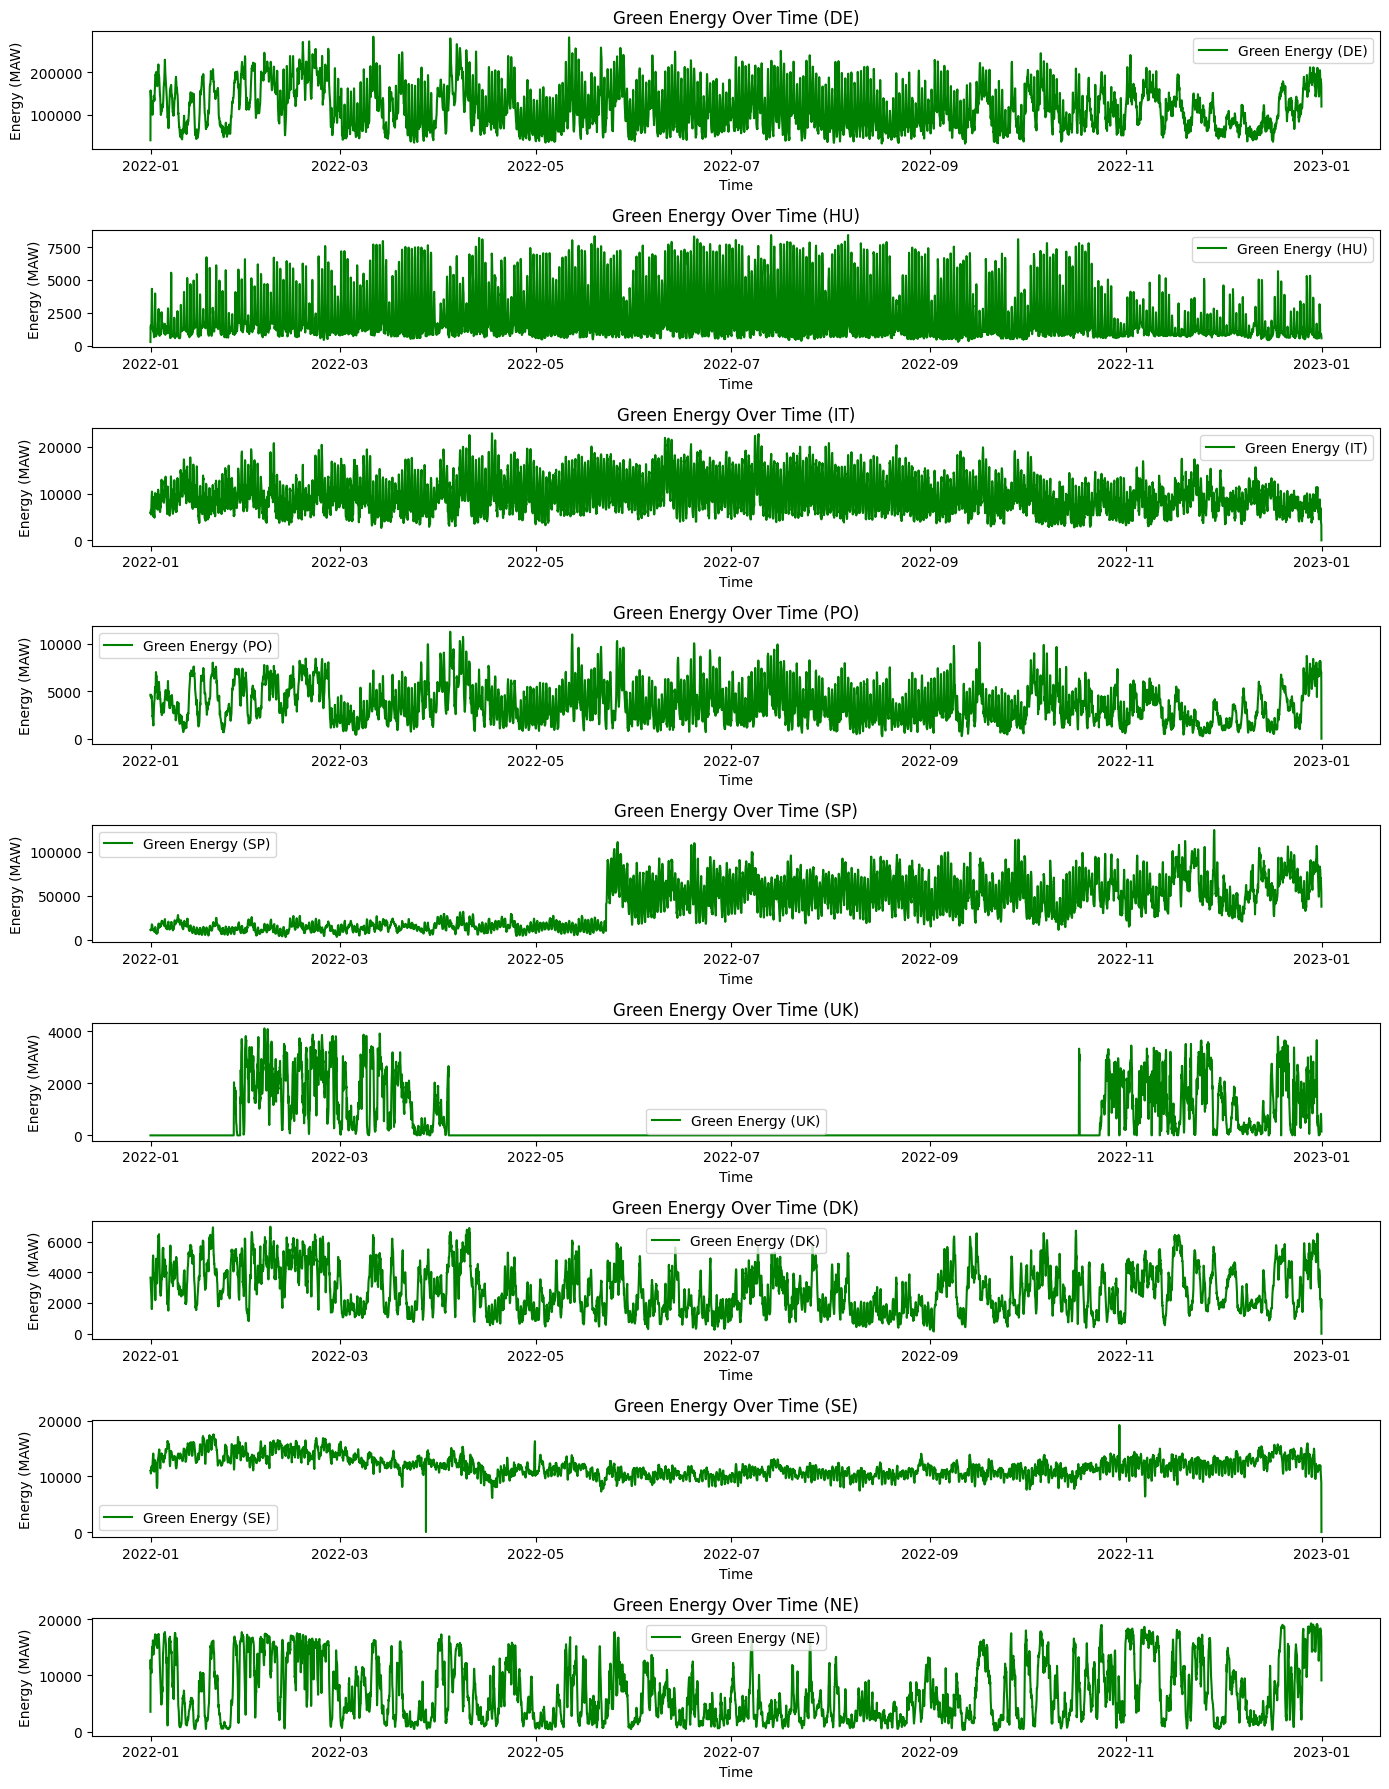

In [15]:
# Time Series Visualization for green energy for each country
fig, axes = plt.subplots(nrows=len(countries), ncols=1, figsize=(14, 2 * len(countries)))

for i, country in enumerate(countries):
    # Plot Green Energy time series
    axes[i].plot(df['start_time'], df[f'green_energy_{country}'], label=f'Green Energy ({country})', color='green')
    axes[i].set_title(f'Green Energy Over Time ({country})')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Energy (MAW)')
    axes[i].legend()

plt.tight_layout()
plt.show()

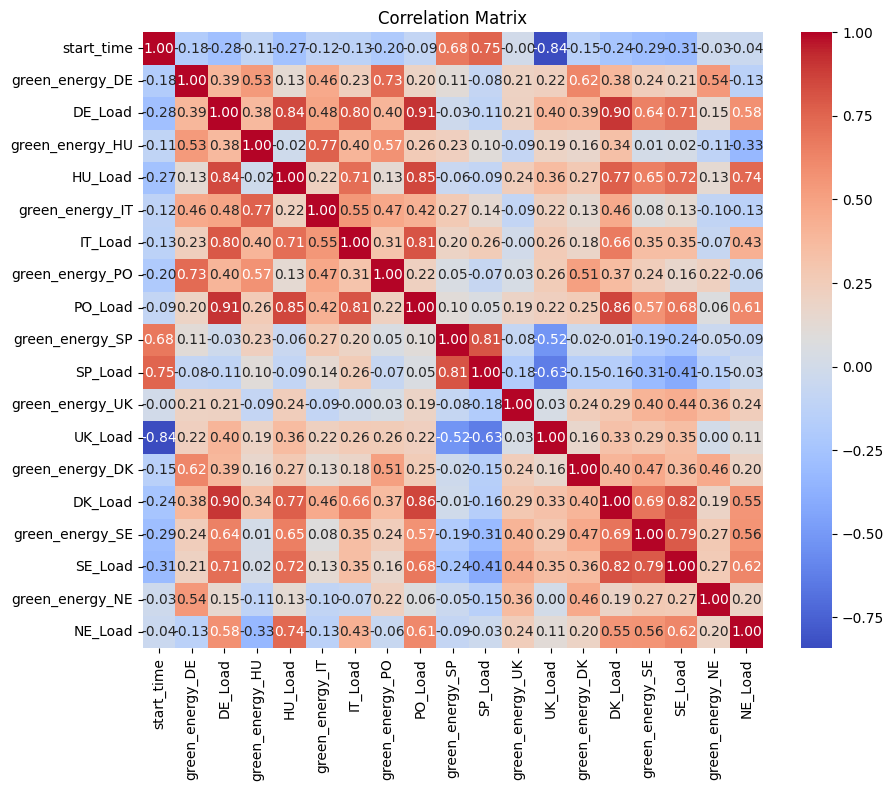

In [11]:
# Calculate and visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

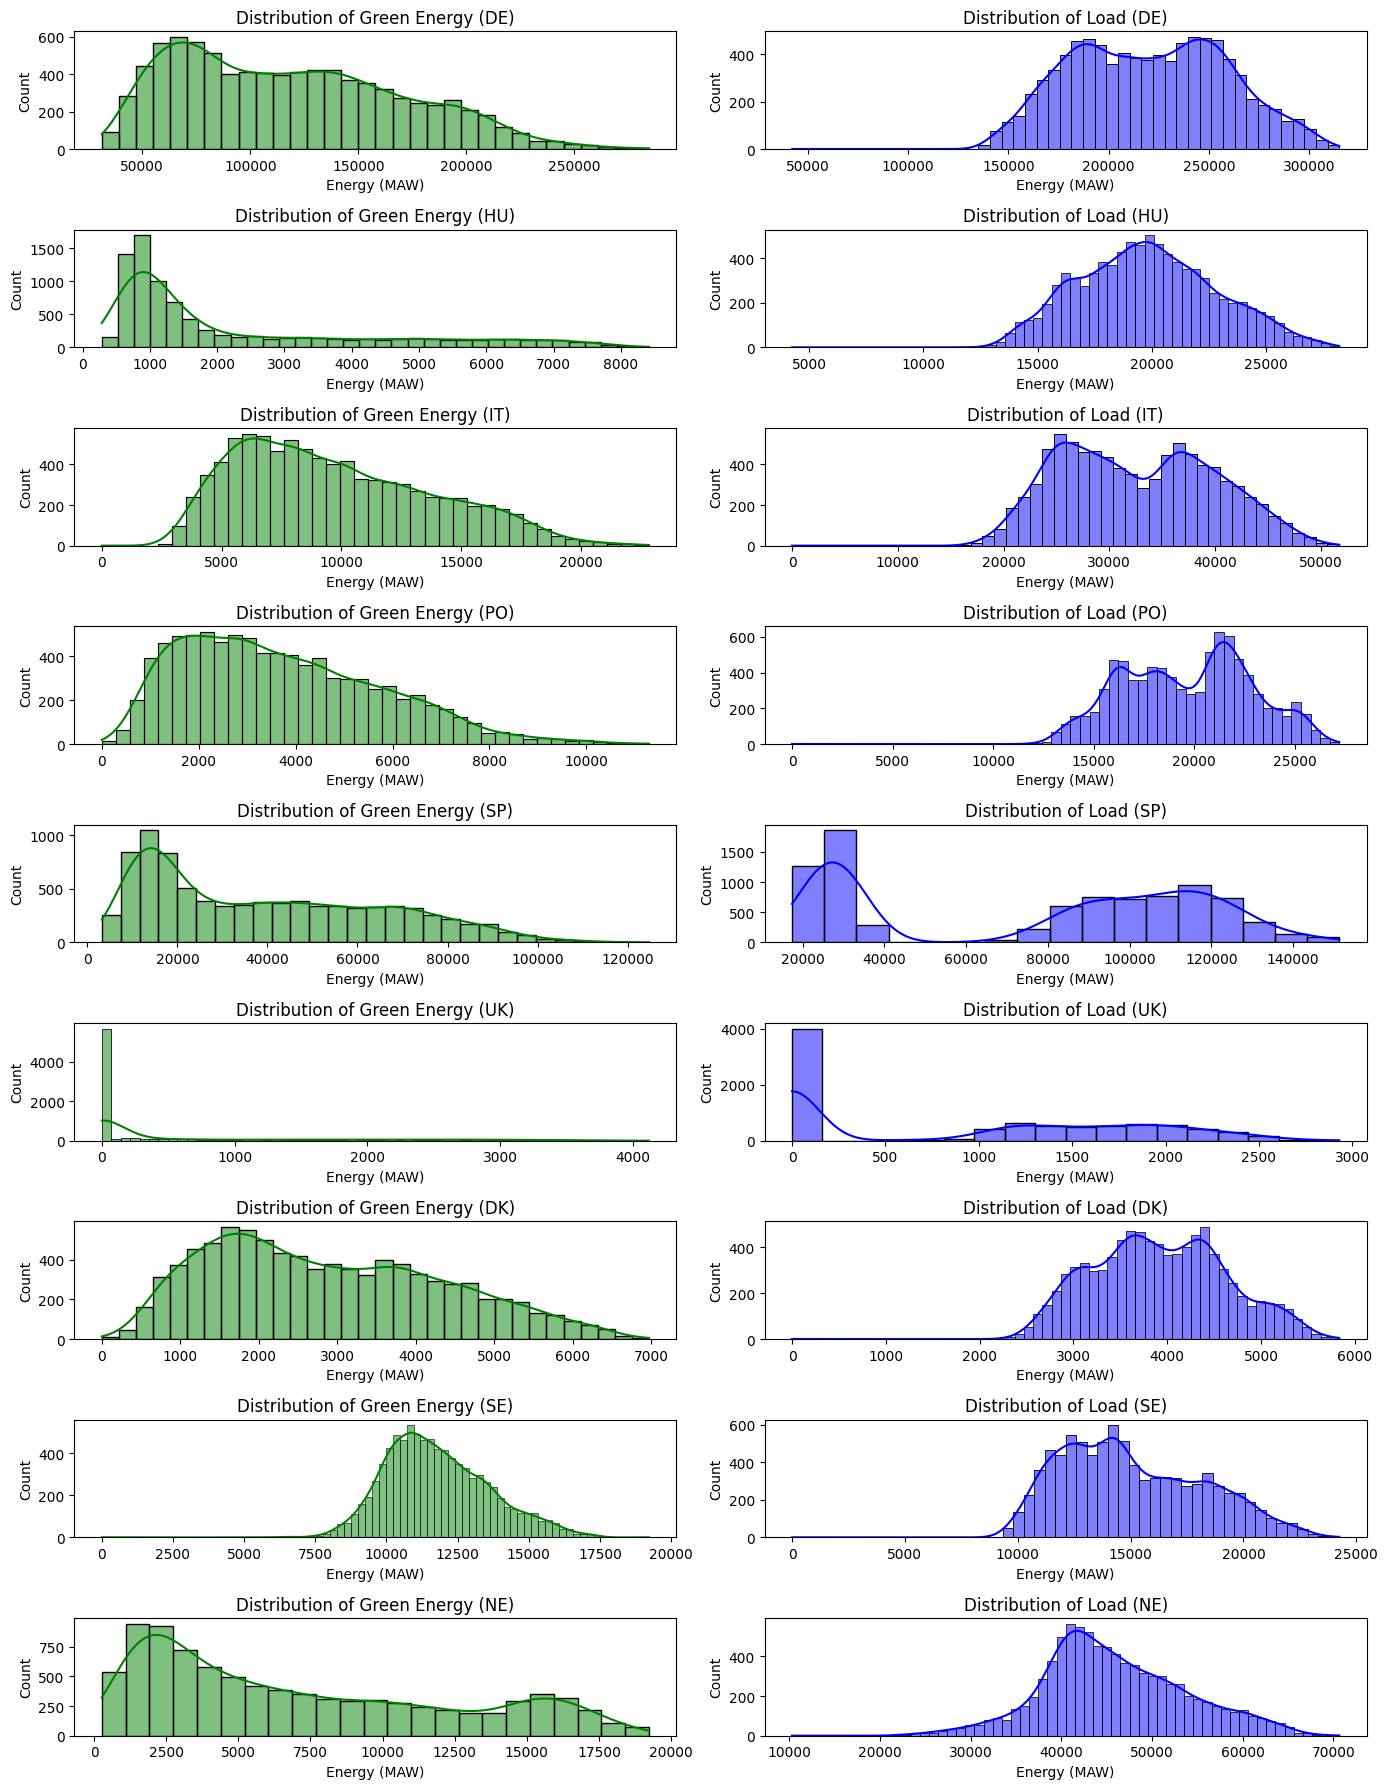

In [14]:
# Distribution Plots for green energy and load for each country in separate subplots
fig, axes = plt.subplots(nrows=len(countries), ncols=2, figsize=(14, 2 * len(countries)))

for i, country in enumerate(countries):
    # Plot Green Energy distribution
    sns.histplot(df[f'green_energy_{country}'], kde=True, ax=axes[i, 0], color='green')
    axes[i, 0].set_title(f'Distribution of Green Energy ({country})')
    axes[i, 0].set_xlabel('Energy (MAW)')

    # Plot Load distribution
    sns.histplot(df[f'{country}_Load'], kde=True, ax=axes[i, 1], color='blue')
    axes[i, 1].set_title(f'Distribution of Load ({country})')
    axes[i, 1].set_xlabel('Energy (MAW)')

plt.tight_layout()
plt.show()
